Sarah Burg <br>
Machine Learning <br>
CS379 <br>
Due date: 4/16/23 <br>
Unit 2 - Individual Project <br>



---


Supervised machine learning algorithm - Random Forest 
<br>
<br>
I chose random forest for this dataset because of my research for unit 2 discussion board. I liked that random forests use multiple decision trees, takes the output of those desision trees, combines those outputs, and gives a single best result.



---


Description: 
<br>
<br>
This dataset contains information on variants of the Portuguese "Vinho Verde" wine. 
<br>
<br>
This program will predict the qualities of these wines.



---


References:

UCI Machine Learning. (N.D.). *Red Wine Quality.* Retrieved from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

Tutorialspoint. (N.D.). *Machine Learning - Supervised.* Retrieved from https://www.tutorialspoint.com/machine_learning/machine_learning_supervised.htm

Pandas. (Apr 03, 2023). *Pandas documentation.* Retrieved from https://pandas.pydata.org/docs/

NumPy. (N.D.). *What is NumPy?* Retrieved from https://numpy.org/doc/stable/user/whatisnumpy.html

ActiveState. (Jul 12, 2022). *What is Matplotlib In Python?* Retrieved from https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/

GeeksforGeeks. (Jun 03, 2020). *Introduction to Seaborn - Python.* Retrieved from https://www.geeksforgeeks.org/introduction-to-seaborn-python/

Scikit-learn. (N.D.). *Splitter Functions.* Retrieved from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Scikit-learn. (N.D.). *1.11.2. Forests of randomized trees.* Retrieved from https://scikit-learn.org/stable/modules/ensemble.html#ensemble-methods

Scikit-learn. (N.D.). *Classification metrics.* Retrieved from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics




---


##Importing the libraries

In [3]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# NumPy is used for working with multidimensional array objects
import numpy as np

# Matplotlib is a plotting library for creating static, animated, 
# and interactive visualizations in Python
import matplotlib.pyplot as plt # Pyplot is a MATLAB-styled interface

# Seaborn is used for data visualization
import seaborn as sns

# Splits arrays and matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# This will import random forest algorithm
from sklearn.ensemble import RandomForestClassifier

# This will give the accuracy classification score
from sklearn.metrics import accuracy_score

##Loading dataset

In [4]:
# Loading the dataset

wine = pd.read_csv('winequality.csv')

##Understanding dataset

In [5]:
# Displaying the first 10 rows in the dataset

wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
# Displaying the last 10 rows in the dataset

wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
# Getting an idea of the count of the rows and the columns in the dataset

wine.shape

(1599, 12)

In [8]:
# Getting statistics on the data so I can start analyzing

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##Checking the integrity of the data

In [9]:
# Checking for any emepty values

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Checking for any null values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Visualizing and analysing data

In [11]:
# Checking the quality values in the dataset to start understanding
# how I want to predict 

wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
# Checking the count of quality values

wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Figure size 700x500 with 0 Axes>

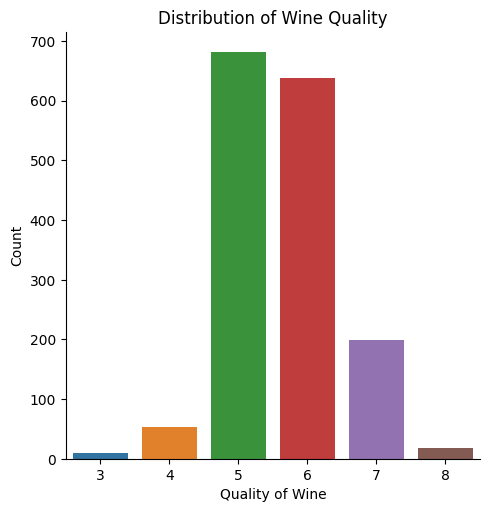

In [56]:
# Visualization to see the data better

plt.figure(figsize=(7, 5))
sns.catplot(x='quality', data = wine, kind = 'count')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality of Wine')
plt.ylabel('Count')
plt.show()

Most of the wines lie in 5 and 6, which are average. Fewer of the wines lie in lower and better quality. 
Still needing to find more properties related to what makes the wine quality better.

In [14]:
# Correlating properties

correlation = wine.corr()

print(correlation['quality'])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


I am going to be making visuals to see which properties correclates most with the wine quality.

I am going to be leaving out the properties volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, and pH because they lie in the negatives.

<Axes: xlabel='quality', ylabel='fixed acidity'>

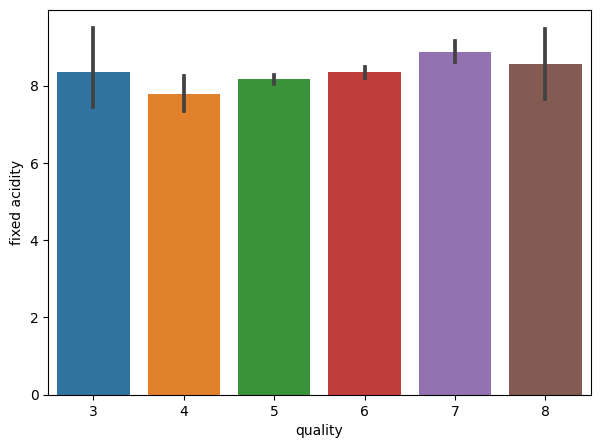

In [69]:
# Visualization of wine quality and fixed acidity

plot = plt.figure(figsize=(7, 5))
sns.barplot(x='quality', y='fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

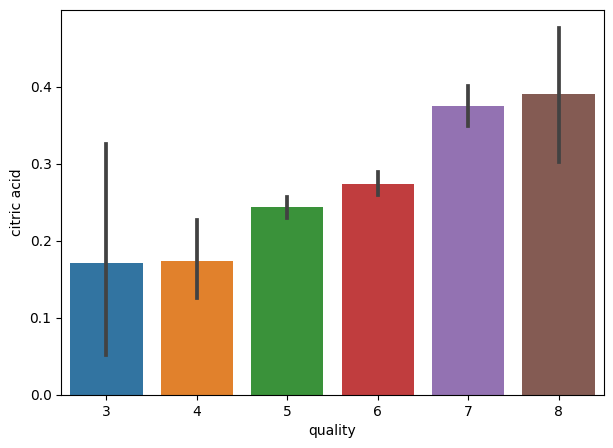

In [66]:
# Visualization of wine quality and citric acid

plot = plt.figure(figsize=(7, 5))
sns.barplot(x='quality', y='citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

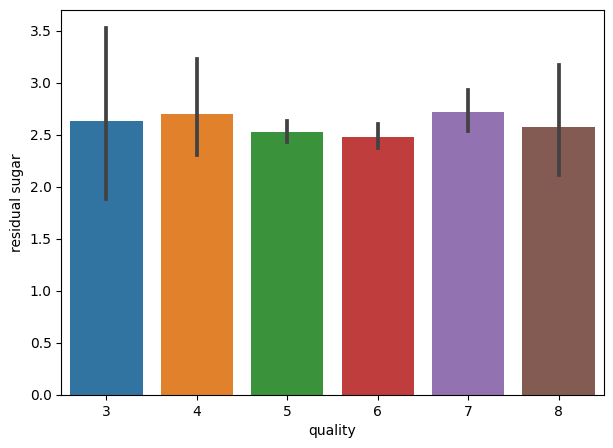

In [67]:
# Visualization of wine quality and fixed residual sugar

plot = plt.figure(figsize=(7, 5))
sns.barplot(x='quality', y='residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

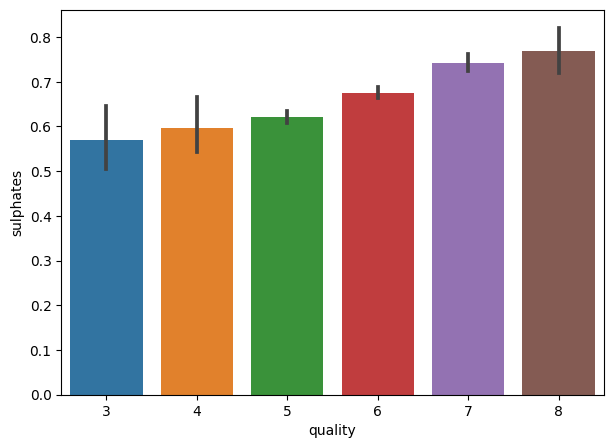

In [64]:
# Visualization of wine quality and sulphates

plot = plt.figure(figsize=(7, 5))
sns.barplot(x='quality', y='sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

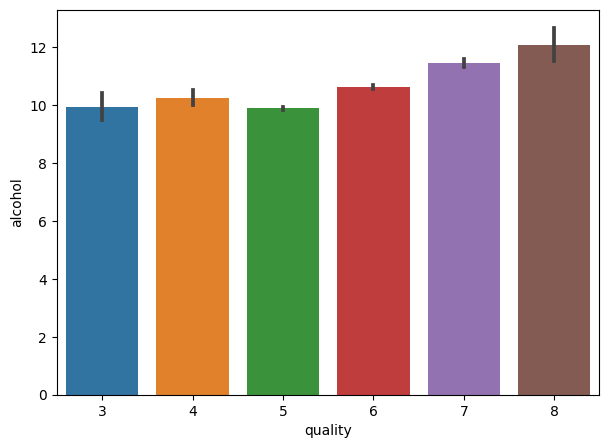

In [57]:
# Visualization of wine quality and alcohol

plot = plt.figure(figsize=(7, 5))
sns.barplot(x='quality', y='alcohol', data = wine)

Visuals show that the wine quality is more positively correlated to the alcohol property than the other properties.

##Training machine learning model

y will repersent the target and will be the good qualities of the wine to predict.

X will repersent the features that are properties of wine that will be used to generate information on the target.

To get y, the focus needs to be on the good qualities (7 & 8) of the wine

In [20]:
# Removing quality from columns because I don't want 
# it to be a property in the features

X = wine.drop('quality', axis='columns')

In [21]:
# Making sure quality was removed

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
# Replacing good qualities with 1 and replacing bad qualities with 0
# This will allow ease during the model training
y = wine['quality'].apply(lambda value: 1 if value >= 7
                                          else 0)

In [23]:
# Checking that the replacements took place
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [24]:
# Spliting the dataset into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

##Using random forest classifier

In [25]:
classifier = RandomForestClassifier()

In [26]:
# Training the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

##Evaluation of the machine learning model

In [27]:
# Predicting values in the machine learning model
classifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [28]:
# Accuracy of the machine learning model
accuracy_score(classifier.predict(X_test), y_test)

0.9375